In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [18]:
df = pd.read_csv("/home/daniele/dm-group-1/Dataset/titanic_train.csv")

In [19]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)

In [20]:
embarked_locs = sorted(df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
df['Embarked_Val'] = df['Embarked'].map(embarked_locs_mapping).astype(int)

TypeError: '<' not supported between instances of 'float' and 'str'

In [16]:
if len(df[df['Embarked'].isnull()] > 0):
    df.replace({'Embarked_Val' : { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S']}}, 
               inplace=True)

NameError: name 'embarked_locs_mapping' is not defined

In [7]:
df['AgeFill'] = df['Age']
df['AgeFill'] = df['AgeFill'].groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [9]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [10]:
df_train = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train = df_train.drop(['Survived', 'Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val', 'Sex_Val'], axis=1)
df_train.dtypes

KeyError: "labels ['Embarked_Val'] not contained in axis"

In [11]:
from sklearn import preprocessing

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Val,AgeFill,FamilySize
0,1,0,3,22.0,1,0,7.2500,1,22.0,1
1,2,1,1,38.0,1,0,71.2833,0,38.0,1
2,3,1,3,26.0,0,0,7.9250,0,26.0,0
3,4,1,1,35.0,1,0,53.1000,0,35.0,1
4,5,0,3,35.0,0,0,8.0500,1,35.0,0


In [13]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_Val', 'AgeFill', 'FamilySize'],
      dtype='object')

In [14]:
import warnings
warnings.filterwarnings('ignore')

min_max_scaler = preprocessing.MinMaxScaler()
for k in df_train.columns:
    df_train[k] = min_max_scaler.fit_transform(df_train[k].values.astype(float))

ValueError: Expected 2D array, got 1D array instead:
array=[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224.
 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238.
 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252.
 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266.
 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280.
 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293. 294.
 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307. 308.
 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321. 322.
 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335. 336.
 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349. 350.
 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405. 406.
 407. 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419. 420.
 421. 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433. 434.
 435. 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447. 448.
 449. 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461. 462.
 463. 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476.
 477. 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489. 490.
 491. 492. 493. 494. 495. 496. 497. 498. 499. 500. 501. 502. 503. 504.
 505. 506. 507. 508. 509. 510. 511. 512. 513. 514. 515. 516. 517. 518.
 519. 520. 521. 522. 523. 524. 525. 526. 527. 528. 529. 530. 531. 532.
 533. 534. 535. 536. 537. 538. 539. 540. 541. 542. 543. 544. 545. 546.
 547. 548. 549. 550. 551. 552. 553. 554. 555. 556. 557. 558. 559. 560.
 561. 562. 563. 564. 565. 566. 567. 568. 569. 570. 571. 572. 573. 574.
 575. 576. 577. 578. 579. 580. 581. 582. 583. 584. 585. 586. 587. 588.
 589. 590. 591. 592. 593. 594. 595. 596. 597. 598. 599. 600. 601. 602.
 603. 604. 605. 606. 607. 608. 609. 610. 611. 612. 613. 614. 615. 616.
 617. 618. 619. 620. 621. 622. 623. 624. 625. 626. 627. 628. 629. 630.
 631. 632. 633. 634. 635. 636. 637. 638. 639. 640. 641. 642. 643. 644.
 645. 646. 647. 648. 649. 650. 651. 652. 653. 654. 655. 656. 657. 658.
 659. 660. 661. 662. 663. 664. 665. 666. 667. 668. 669. 670. 671. 672.
 673. 674. 675. 676. 677. 678. 679. 680. 681. 682. 683. 684. 685. 686.
 687. 688. 689. 690. 691. 692. 693. 694. 695. 696. 697. 698. 699. 700.
 701. 702. 703. 704. 705. 706. 707. 708. 709. 710. 711. 712. 713. 714.
 715. 716. 717. 718. 719. 720. 721. 722. 723. 724. 725. 726. 727. 728.
 729. 730. 731. 732. 733. 734. 735. 736. 737. 738. 739. 740. 741. 742.
 743. 744. 745. 746. 747. 748. 749. 750. 751. 752. 753. 754. 755. 756.
 757. 758. 759. 760. 761. 762. 763. 764. 765. 766. 767. 768. 769. 770.
 771. 772. 773. 774. 775. 776. 777. 778. 779. 780. 781. 782. 783. 784.
 785. 786. 787. 788. 789. 790. 791. 792. 793. 794. 795. 796. 797. 798.
 799. 800. 801. 802. 803. 804. 805. 806. 807. 808. 809. 810. 811. 812.
 813. 814. 815. 816. 817. 818. 819. 820. 821. 822. 823. 824. 825. 826.
 827. 828. 829. 830. 831. 832. 833. 834. 835. 836. 837. 838. 839. 840.
 841. 842. 843. 844. 845. 846. 847. 848. 849. 850. 851. 852. 853. 854.
 855. 856. 857. 858. 859. 860. 861. 862. 863. 864. 865. 866. 867. 868.
 869. 870. 871. 872. 873. 874. 875. 876. 877. 878. 879. 880. 881. 882.
 883. 884. 885. 886. 887. 888. 889. 890. 891.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
df_train.head()

,Pclass,Fare,AgeFill,FamilySize
0,1.0,0.014151,0.271174,0.1
1,0.0,0.139136,0.472229,0.1
2,1.0,0.015469,0.321438,0.0
3,0.0,0.103644,0.434531,0.1
4,1.0,0.015713,0.434531,0.0


In [21]:
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[ 1.        ,  0.01415106,  0.27117366,  0.1       ],
       [ 0.        ,  0.13913574,  0.4722292 ,  0.1       ],
       [ 1.        ,  0.01546857,  0.32143755,  0.        ],
       ..., 
       [ 1.        ,  0.04577135,  0.26489068,  0.3       ],
       [ 0.        ,  0.0585561 ,  0.32143755,  0.        ],
       [ 1.        ,  0.01512699,  0.39683338,  0.        ]])

In [22]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val' : 
                       { embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
                       }
                   }, 
                   inplace=True)
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

In [23]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [24]:
kmeans = KMeans(n_clusters = 3)

In [25]:
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
len(kmeans.cluster_centers_)

3

In [29]:
kmeans.cluster_centers_[2]

array([ 0.5       ,  0.0403299 ,  0.36998249,  0.07826087])

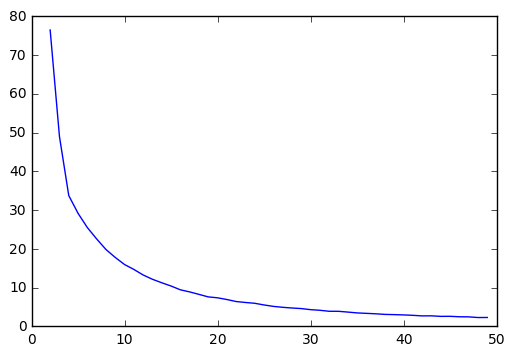

In [31]:
# kmeans
sse_list = list()
max_k = 50
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [32]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print 'centers', kmeans.cluster_centers_
print 'labels', dict(zip(bins, hist))
print 'sse', kmeans.inertia_
print 'silhouette', silhouette_score(train_data, kmeans.labels_)

centers [[  1.00000000e+00   3.00565460e-02   2.01078740e-01   1.84615385e-01]
 [  4.44089210e-16   1.23878078e-01   3.95494378e-01   5.73770492e-02]
 [  1.00000000e+00   1.95015819e-02   5.36934578e-01   4.32835821e-02]
 [  5.00000000e-01   3.43833778e-02   4.46082317e-01   4.61538462e-02]
 [  1.00000000e+00   1.96671054e-02   2.96572529e-01   1.07843137e-02]
 [  1.00000000e+00   6.25549642e-02   1.87172875e-01   5.28260870e-01]
 [ -1.11022302e-16   1.11401166e-01   6.70940347e-01   6.26865672e-02]
 [  0.00000000e+00   4.77886766e-01   3.53047946e-01   2.03703704e-01]
 [  5.00000000e-01   5.46455865e-02   1.86779202e-01   1.55555556e-01]
 [  1.00000000e+00   1.35752559e-01   2.90022619e-01   1.00000000e+00]]
labels {0: 65, 1: 122, 2: 67, 3: 130, 4: 306, 5: 46, 6: 67, 7: 27, 8: 54, 9: 7}
sse 16.3562544932
silhouette 0.457785885415


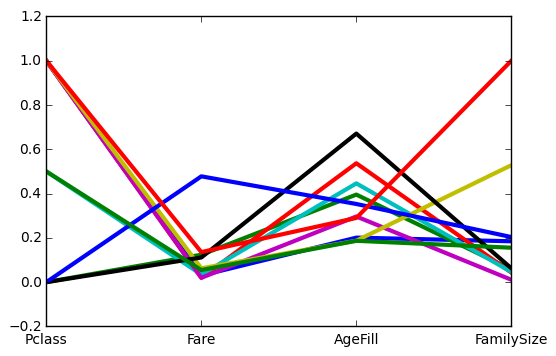

In [37]:
for i in range(0, 10):
    plt.plot(range(0, 4), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 4), list(df_train.columns))
#plt.legend()
plt.show()

In [38]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

In [39]:
df_clusters.head()

,Pclass,Fare,AgeFill,FamilySize,Labels
0,1.0,0.014151,0.271174,0.1,4
1,0.0,0.139136,0.472229,0.1,1
2,1.0,0.015469,0.321438,0.0,4
3,0.0,0.103644,0.434531,0.1,1
4,1.0,0.015713,0.434531,0.0,2


In [40]:
pclass_xt = pd.crosstab(df_clusters['Pclass'], df_clusters['Labels'])
pclass_xt

Labels,0,1,2,3,4,5,6,7,8,9
Pclass,,,,,,,,,,
0.0,0,122,0,0,0,0,67,27,0,0
0.5,0,0,0,130,0,0,0,0,54,0
1.0,65,0,67,0,306,46,0,0,0,7


In [54]:
psurv_xt = pd.crosstab(df['Survived'], df_clusters['Labels'])
psurv_xt

Labels,0,1,2,3,4,5,6,7,8,9
Survived,,,,,,,,,,
0,29,37,61,80,233,42,35,8,17,7
1,36,85,6,50,73,4,32,19,37,0


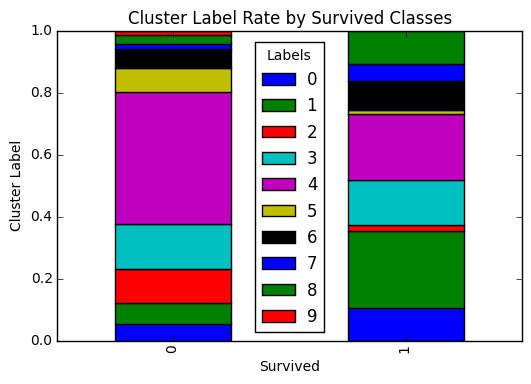

In [57]:
psurv_xt_pct = psurv_xt.div(psurv_xt.sum(1).astype(float), axis=0)
psurv_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Survived Classes')
plt.xlabel('Survived')
plt.ylabel('Cluster Label')
plt.show()

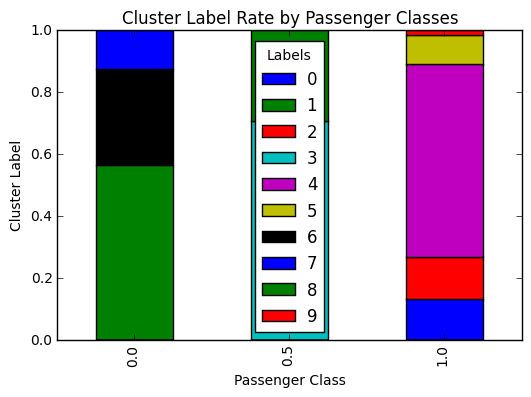

In [41]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Cluster Label')
plt.show()

In [42]:
df_clusters.describe()

,Pclass,Fare,AgeFill,FamilySize,Labels
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.062858,0.360548,0.090460,3.575758
std,0.418036,0.096995,0.167183,0.161346,2.112466
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.015440,0.264891,0.000000,2.000000
50%,1.000000,0.028213,0.321438,0.000000,4.000000
75%,1.000000,0.060508,0.447097,0.100000,4.000000
max,1.000000,1.000000,1.000000,1.000000,9.000000


In [43]:
df_clusters[df_clusters['Labels']==3].describe()

,Pclass,Fare,AgeFill,FamilySize,Labels
count,130.0,130.000000,130.000000,130.000000,130.0
mean,0.5,0.034383,0.446082,0.046154,3.0
std,0.0,0.020135,0.128196,0.080842,0.0
min,0.5,0.000000,0.283740,0.000000,3.0
25%,0.5,0.025374,0.359135,0.000000,3.0
50%,0.5,0.025374,0.409399,0.000000,3.0
75%,0.5,0.050749,0.519352,0.100000,3.0
max,0.5,0.143462,0.874340,0.400000,3.0


In [44]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [45]:
print 'ward'
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, ward.labels_)

ward
labels {0: 184, 1: 107, 2: 387, 3: 62, 4: 109, 5: 42}
silhouette 0.489209496055


In [46]:
print 'average linkage'
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, average_linkage.labels_)

average linkage
labels {0: 386, 1: 484, 2: 5, 3: 7, 4: 6, 5: 3}
silhouette 0.470285567065


In [47]:
print 'complete linkage'
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, complete_linkage.labels_)

complete linkage
labels {0: 40, 1: 791, 2: 6, 3: 3, 4: 7, 5: 44}
silhouette 0.0942794318774


In [49]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

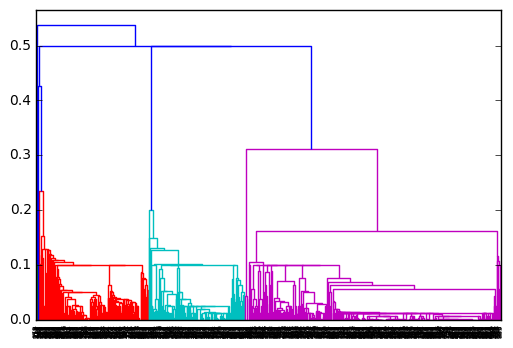

In [50]:
# single linkage and dendogram using scipy
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link)

In [51]:
# density based clustering
print 'dbscan'

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, dbscan.labels_)

dbscan
labels {0: 484, 1: 207, 2: 183, 3: 5, 4: 7, 5: 0, -1: 5}
silhouette 0.563847172922


In [52]:
dbscan.labels_[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 2])